<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Understanding-The-Data" data-toc-modified-id="Understanding-The-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understanding The Data</a></span></li><li><span><a href="#Exploratory-Model" data-toc-modified-id="Exploratory-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Model</a></span><ul class="toc-item"><li><span><a href="#WO-Country" data-toc-modified-id="WO-Country-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>WO Country</a></span></li><li><span><a href="#W-Country" data-toc-modified-id="W-Country-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>W Country</a></span></li></ul></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Best Model</a></span><ul class="toc-item"><li><span><a href="#Extra-Trees-Regressor" data-toc-modified-id="Extra-Trees-Regressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Extra Trees Regressor</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering</a></span></li></ul></div>

# Preparation

In [30]:
#Loading Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret
import plotly.express as px
from pycaret.regression import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [45]:
#Reading Data
train=pd.read_excel("Train Data.xlsx")

# Understanding The Data

In [32]:
#Train Data Structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        600 non-null    object 
 1   Year                                                           600 non-null    int64  
 2   C&Y                                                            600 non-null    object 
 3   Prevalence of Undernourishment (%)                             480 non-null    float64
 4   GDP per Capita t-1 (Current US$)                               600 non-null    float64
 5   Food Price Index (May)                                         600 non-null    float64
 6   Agri to GDP t-1 (%)                                            600 non-null    float64
 7   Agri Raw Materials Import to Total Merchandise Import t-1 (%)  

In [33]:
train.describe()

,Year,Prevalence of Undernourishment (%),GDP per Capita t-1 (Current US$),Food Price Index (May),Agri to GDP t-1 (%),Agri Raw Materials Import to Total Merchandise Import t-1 (%)
count,600.000000,480.000000,600.000000,600.000000,600.000000,600.000000
mean,2017.500000,4.509583,20860.025968,110.921989,7.334404,1.487031
std,2.874678,5.952617,24335.163044,25.219787,7.002313,0.832950
min,2013.000000,0.000000,570.909967,61.716051,0.187098,0.033175
25%,2015.000000,0.000000,3772.666933,100.129300,2.090128,0.866231
50%,2017.500000,0.000000,11345.080482,103.896950,3.940702,1.265559
75%,2020.000000,7.700000,28470.146000,114.112050,11.110814,1.906986
max,2022.000000,23.400000,135682.794275,433.221600,42.523918,5.896540


In [46]:
train=train.drop(['C&Y','Year'],axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

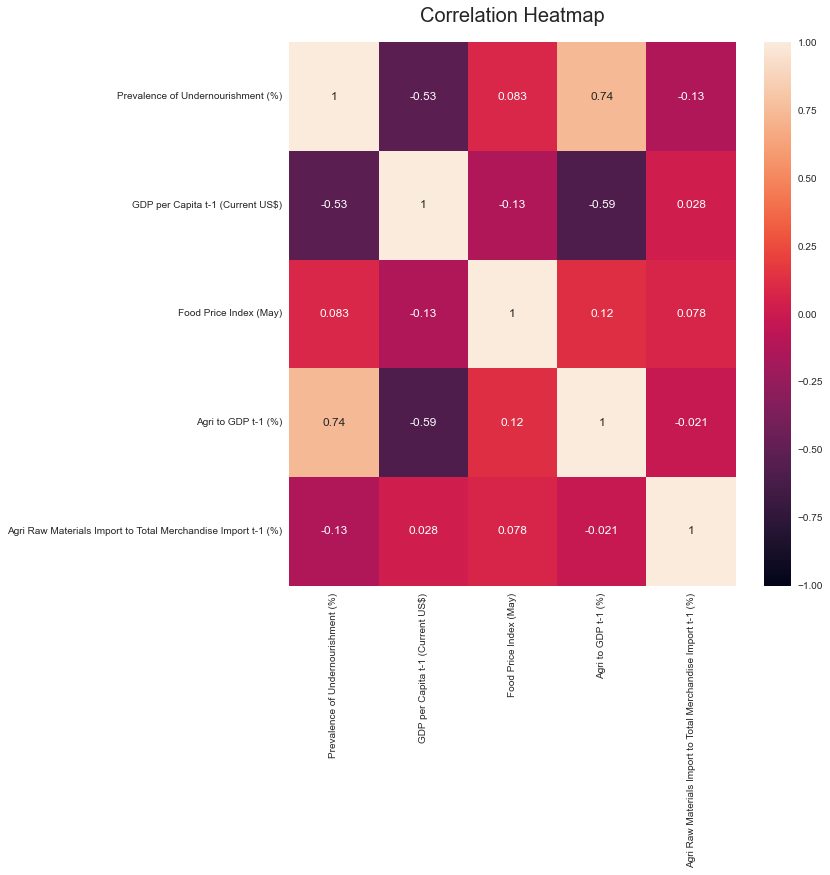

In [47]:
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20)

# Exploratory Model

## WO Country

In [48]:
#Dropping Index
train1=train.drop(['Country'],axis=1)

In [49]:
model_exp = setup(train1, target = 'Prevalence of Undernourishment (%)', use_gpu=True, train_size = 0.8)

,Description,Value
0,session_id,2886
1,Target,Prevalence of Undernourishment (%)
2,Original Data,"(480, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(384, 4)"


In [11]:
compare_models(sort = 'r2', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.1058,4.2754,2.0069,0.8609,0.4259,0.2452,1.0540
catboost,CatBoost Regressor,1.3033,5.3191,2.2916,0.8230,0.4786,0.2688,2.3250
rf,Random Forest Regressor,1.2644,5.6690,2.3473,0.8089,0.4502,0.2841,1.0540
xgboost,Extreme Gradient Boosting,1.3222,6.6253,2.5323,0.7813,0.4758,0.3084,0.7680
gbr,Gradient Boosting Regressor,1.4739,6.8430,2.5884,0.7807,0.5278,0.3102,0.1190
lightgbm,Light Gradient Boosting Machine,1.7677,8.3364,2.8463,0.7325,0.5564,0.3922,0.9090
ada,AdaBoost Regressor,2.4949,9.9187,3.1412,0.6727,0.8367,0.4373,0.1110
dt,Decision Tree Regressor,1.3453,10.0211,3.1264,0.6677,0.5571,0.3246,0.0120
knn,K Neighbors Regressor,2.0849,10.6309,3.2387,0.6557,0.7003,0.4547,0.4320
ridge,Ridge Regression,2.8508,15.3668,3.8816,0.5275,0.8261,0.5711,0.0100


[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=493, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=493, verbose=0, warm_start=False)]

In [12]:
model_exp = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8237,3.1660,1.7793,0.9045,0.4431,0.1719
1,1.2168,3.8266,1.9562,0.8962,0.2420,0.2470
2,1.0636,3.6242,1.9037,0.8647,0.3336,0.2655
3,0.8296,1.9374,1.3919,0.9262,0.2597,0.2447
4,1.4624,5.4714,2.3391,0.9037,0.3540,0.2730
5,0.9874,3.1257,1.7680,0.9326,0.3818,0.1680
6,0.7356,1.4562,1.2067,0.9464,0.4523,0.1142
7,1.5195,7.8223,2.7968,0.6766,0.7308,0.2253
8,1.3336,7.6536,2.7665,0.7899,0.5907,0.2830


In [13]:
evaluate_model(model_exp)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

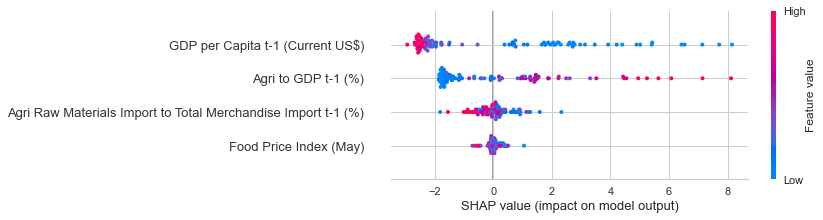

In [14]:
interpret_model(model_exp, plot = 'summary')

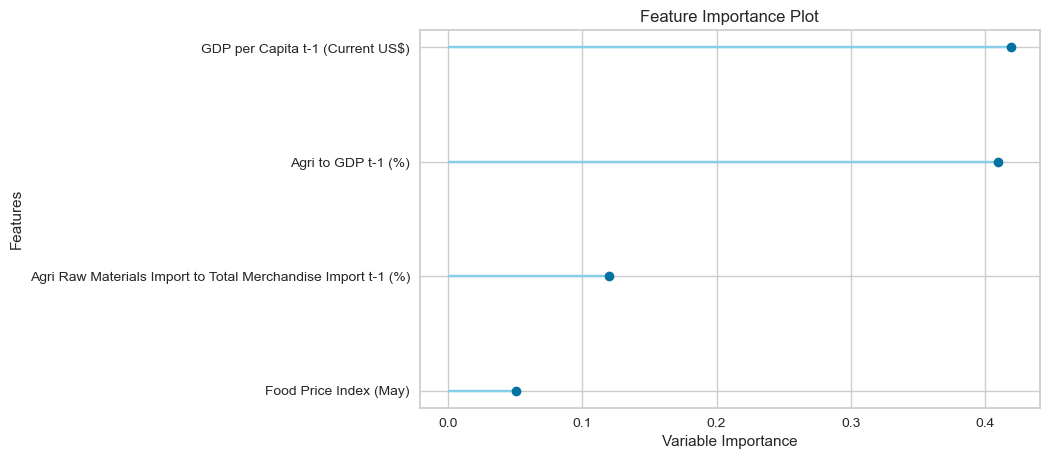

In [15]:
plot_model(model_exp, plot = 'feature')

In [16]:
#Reading Test Data
test=pd.read_excel("Test Data.xlsx")

In [17]:
pred_holdout = predict_model(model_exp)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1066,4.0986,2.0245,0.8898,0.3804,0.1850


In [18]:
pred_unseen = predict_model(model_exp, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0,0,0,0,0,0


## W Country

In [19]:
model_exp = setup(train, target = 'Prevalence of Undernourishment (%)', use_gpu=True, train_size = 0.8)

,Description,Value
0,session_id,2012
1,Target,Prevalence of Undernourishment (%)
2,Original Data,"(600, 6)"
3,Missing Values,True
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(384, 64)"


In [20]:
compare_models(sort = 'r2', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3113,0.5380,0.6718,0.9838,0.1278,0.0714,1.0710
lr,Linear Regression,0.5014,0.8463,0.8932,0.9754,0.1727,0.1216,0.0290
br,Bayesian Ridge,0.4939,0.8705,0.8983,0.9752,0.1619,0.1154,0.0530
catboost,CatBoost Regressor,0.5983,1.2381,1.0313,0.9629,0.2390,0.1217,2.6170
ridge,Ridge Regression,0.8211,1.8458,1.3155,0.9496,0.3098,0.1595,0.0140
gbr,Gradient Boosting Regressor,0.7191,1.7186,1.2076,0.9490,0.3047,0.1433,0.1810
xgboost,Extreme Gradient Boosting,0.5855,1.7829,1.2329,0.9464,0.2372,0.1310,0.7510
rf,Random Forest Regressor,0.5978,1.8136,1.2215,0.9459,0.2307,0.1409,1.3850
dt,Decision Tree Regressor,0.6604,3.6480,1.6103,0.8924,0.2632,0.1310,0.0140
ada,AdaBoost Regressor,1.9541,6.1989,2.4554,0.8211,0.7087,0.3382,0.1350


[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2012, verbose=0, warm_start=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
 BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False)]

In [21]:
model_exp = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2055,0.2346,0.4843,0.9933,0.0429,0.0550
1,0.3449,0.5065,0.7117,0.9868,0.0902,0.0961
2,0.2968,0.3904,0.6248,0.9895,0.2086,0.0814
3,0.4428,1.1783,1.0855,0.9595,0.3697,0.0722
4,0.6269,1.7207,1.3118,0.9466,0.2220,0.1004
5,0.2323,0.1844,0.4295,0.9961,0.0877,0.0568
6,0.3440,0.3821,0.6181,0.9875,0.1132,0.1033
7,0.1903,0.1343,0.3665,0.9967,0.0402,0.0387
8,0.1807,0.1387,0.3725,0.9954,0.0395,0.0434


In [22]:
evaluate_model(model_exp)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

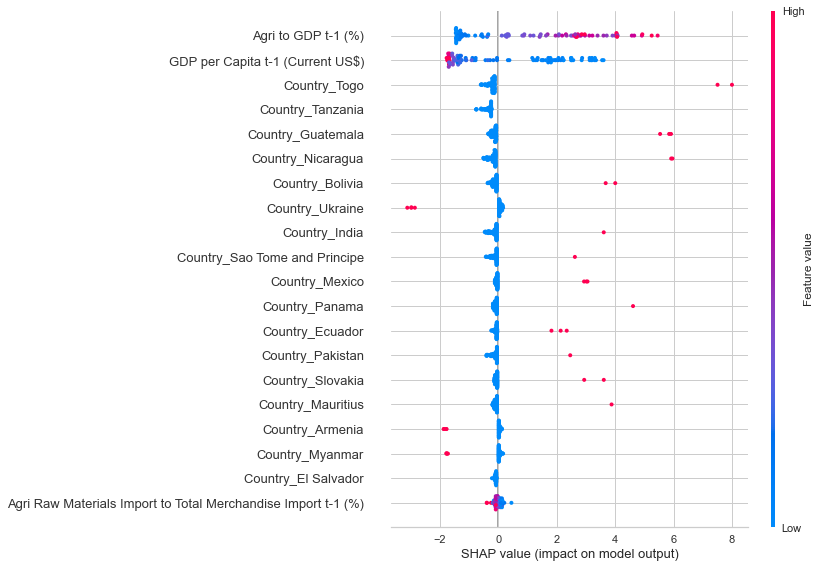

In [23]:
interpret_model(model_exp, plot = 'summary')

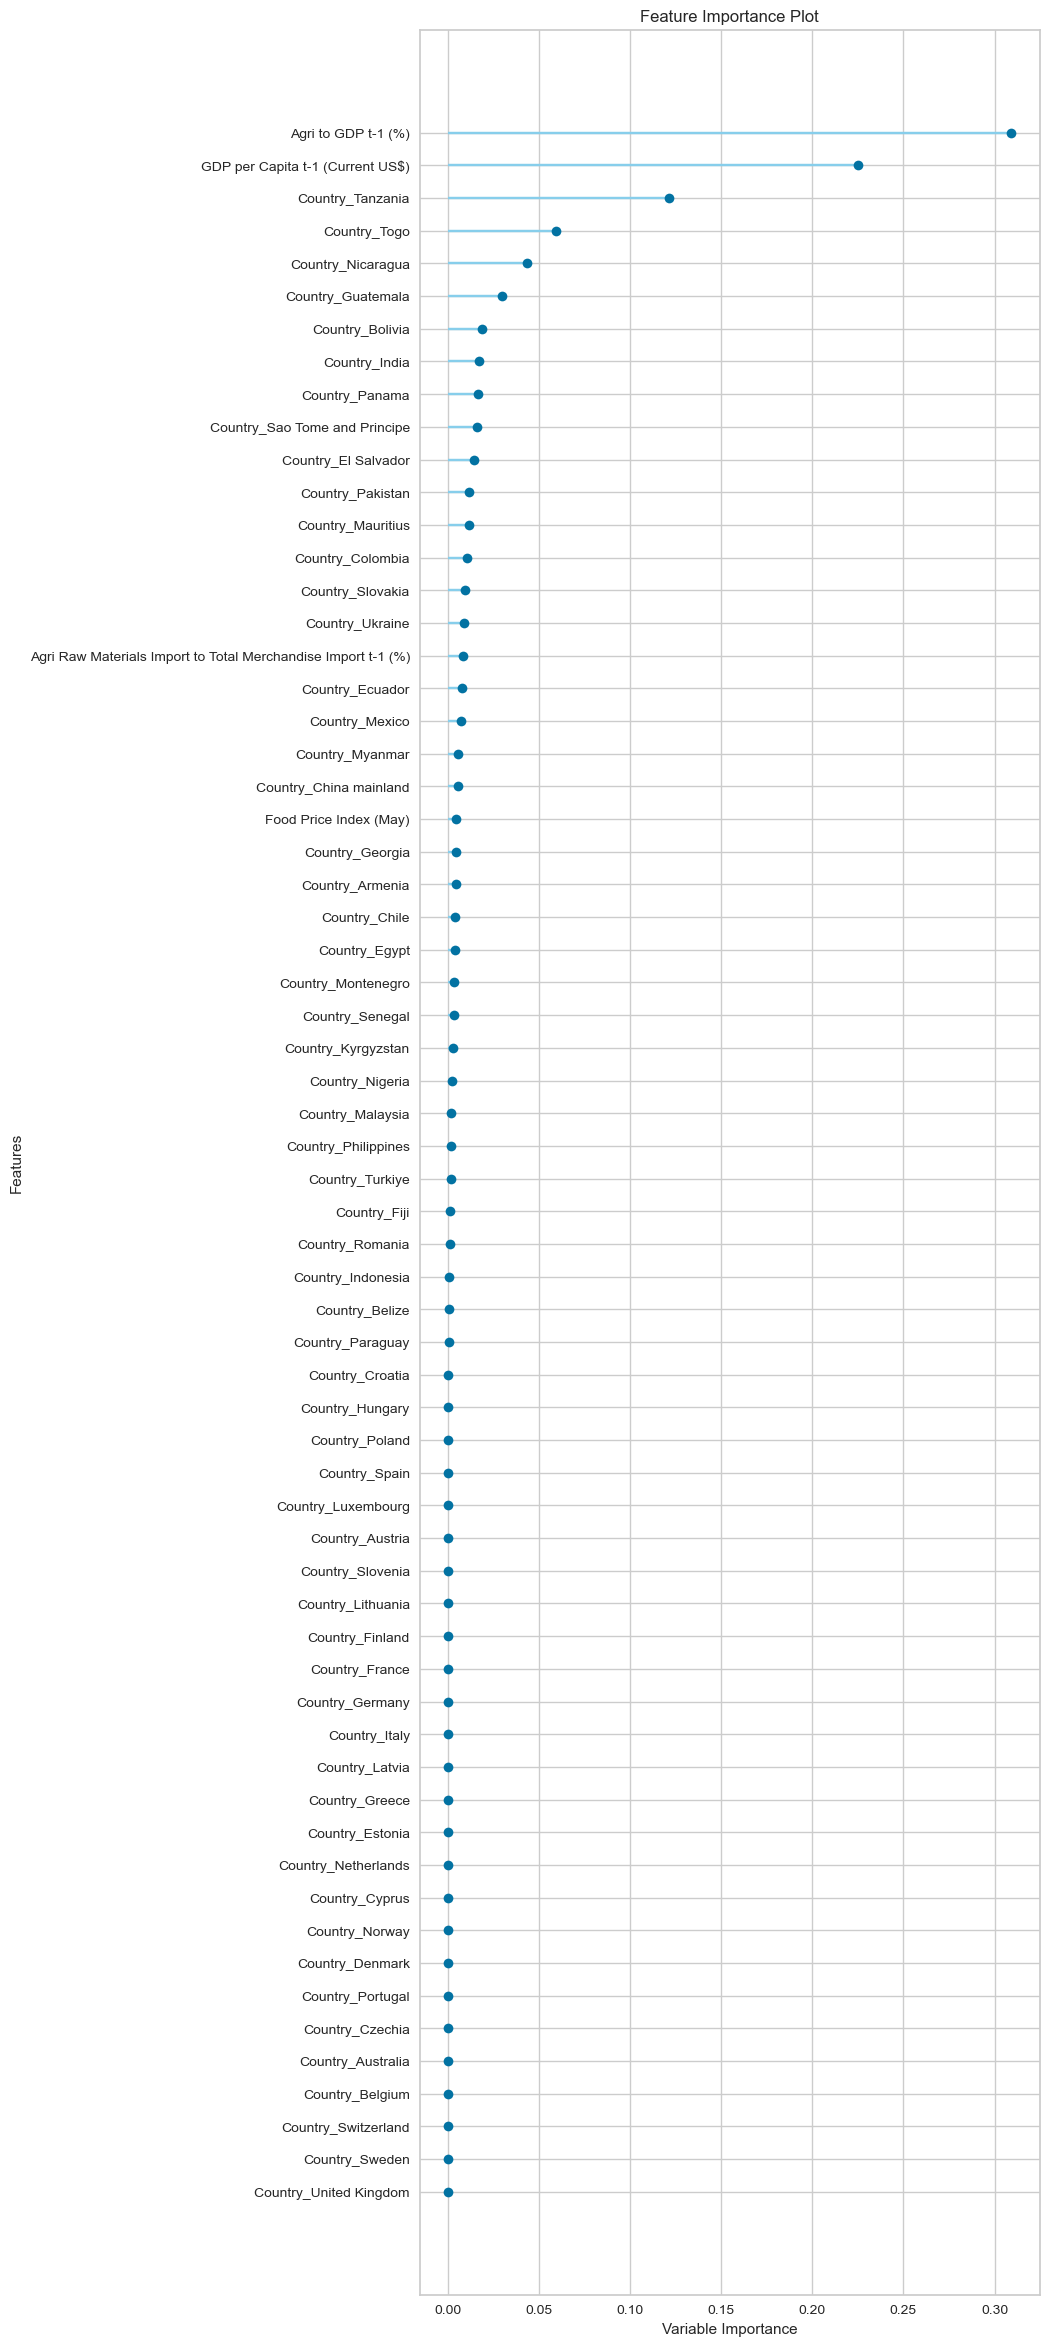

In [24]:
plot_model(model_exp, plot = 'feature_all')

# Best Model

## Extra Trees Regressor

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
import pickle

In [51]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Prevalence of Undernourishment (%)                             480 non-null    float64
 1   GDP per Capita t-1 (Current US$)                               480 non-null    float64
 2   Food Price Index (May)                                         480 non-null    float64
 3   Agri to GDP t-1 (%)                                            480 non-null    float64
 4   Agri Raw Materials Import to Total Merchandise Import t-1 (%)  480 non-null    float64
dtypes: float64(5)
memory usage: 18.9 KB


In [52]:
model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5496, verbose=0, warm_start=False)
X = train1.drop(['Prevalence of Undernourishment (%)'],axis=1)
y = train1['Prevalence of Undernourishment (%)']
#Fit The Model
model.fit(X,y)
#This model will be used to predict the Prevalence of Undernourishment (%)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5496, verbose=0, warm_start=False)

# Clustering

In [76]:
#After predict the result, we try to cluster the data for more insight
data = pd.read_excel('All Data.xlsx')
data.head(3)

,Country,Year,C&Y,Prevalence of Undernourishment (%),GDP per Capita t-1 (Current US$),Food Price Index (May),Agri to GDP t-1 (%),Agri Raw Materials Import to Total Merchandise Import t-1 (%)
0,Armenia,2013,Armenia2013,3.2,3681.844691,96.609801,17.912682,1.189197
1,Armenia,2014,Armenia2014,2.8,3838.173880,97.995054,18.434763,1.089694
2,Armenia,2015,Armenia2015,2.8,3986.231624,102.964598,18.072036,1.514212


In [77]:
#We create scatter plot to understand the distributin of the data
fig = px.scatter_matrix(data.drop(['C&Y','Year','Country','Prevalence of Undernourishment (%)'],axis=1),
width=1200, height=1600)
fig.show()

In [78]:
#Clustering 4 features
data_cluster = data[(data.Year == 2022)]
fig1 = px.scatter(data_cluster, x="Prevalence of Undernourishment (%)", y="Food Price Index (May)", color="Agri to GDP t-1 (%)",
                 size="GDP per Capita t-1 (Current US$)",text='Country')
fig1.update_layout(title="Clustering Food")
fig1.show()

In [79]:
#We try to find the best cluster for our data with K-means algorithm
X=data.drop(['C&Y','Year','Country','Prevalence of Undernourishment (%)'],axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [80]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=42, tol=0.0001,
       verbose=0)

In [81]:
data['cluster']=kmeans.labels_

In [82]:
data['cluster'].unique()

array([2, 1, 0])

In [83]:
#After clustering, we can know the distribution of clustered country
pie=data.groupby('cluster').size().reset_index()
pie.columns=['cluster','value']
px.pie(pie,values='value',names='cluster',color=['blue','red','green'])